In [1]:
import numpy as np
import colour_calcs_3 as cc
from colormath.color_objects import sRGBColor
import cv2
from matplotlib import pyplot as plt
import tkinter as tk
np.set_printoptions(suppress=True, precision=4)

In [2]:
print('Colour Matching Matrix')
# print(cc.CIE)
print(cc.CIE.shape)
xvals = np.arange(61) * 5 + 400

Colour Matching Matrix
(61, 3)


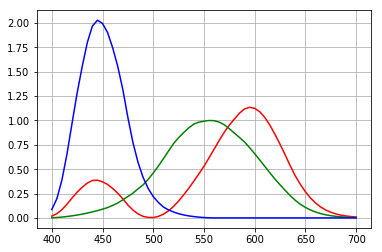

In [3]:
plt.plot(xvals, cc.CIE[:,0], 'r-')
plt.plot(xvals, cc.CIE[:,1], 'g-')
plt.plot(xvals, cc.CIE[:,2], 'b-')
plt.grid(True)
plt.show()

0


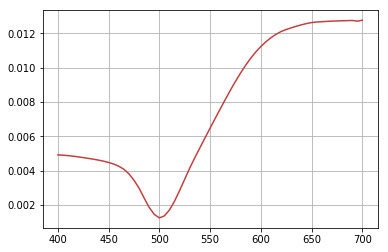

[192.      63.9994  64.    ]


In [4]:
RGB = np.array([192, 64, 64]) / 255.
prob, spdf_orig = cc.rgb2spdf(RGB[0], RGB[1], RGB[2])
print(prob)
plt.grid(True)
plt.plot(xvals, spdf_orig, color = (RGB))
plt.show()
XYZ_hat = cc.spdf2xyz(spdf_orig, prob)
RGB_hat = cc.xyz2rgb(XYZ_hat[0], XYZ_hat[1], XYZ_hat[2])
print(RGB_hat * 255)

In [6]:
protanope = np.copy(cc.CIE)
protanope = protanope * np.array([0., 1., 1.])
print(protanope)
XYZ_p = cc.spdf2xyz(spdf_orig, prob, cmatch = protanope)
RGB_p = cc.xyz2rgb(XYZ_p[0], XYZ_p[1], XYZ_p[2])
print(RGB_p * 255)

[[0.     0.002  0.086 ]
 [0.     0.0045 0.1971]
 [0.     0.0088 0.3894]
 [0.     0.0145 0.6568]
 [0.     0.0214 0.9725]
 [0.     0.0295 1.2825]
 [0.     0.0387 1.5535]
 [0.     0.0496 1.7985]
 [0.     0.0621 1.9673]
 [0.     0.0747 2.0273]
 [0.     0.0895 1.9948]
 [0.     0.1063 1.9007]
 [0.     0.1282 1.7454]
 [0.     0.1528 1.5549]
 [0.     0.1852 1.3176]
 [0.     0.2199 1.0302]
 [0.     0.2536 0.7721]
 [0.     0.2977 0.5701]
 [0.     0.3391 0.4153]
 [0.     0.3954 0.3024]
 [0.     0.4608 0.2185]
 [0.     0.5314 0.1592]
 [0.     0.6067 0.112 ]
 [0.     0.6857 0.0822]
 [0.     0.7618 0.0607]
 [0.     0.8233 0.043 ]
 [0.     0.8752 0.0305]
 [0.     0.9238 0.0206]
 [0.     0.962  0.0137]
 [0.     0.9822 0.0079]
 [0.     0.9918 0.004 ]
 [0.     0.9991 0.0011]
 [0.     0.9973 0.    ]
 [0.     0.9824 0.    ]
 [0.     0.9556 0.    ]
 [0.     0.9152 0.    ]
 [0.     0.8689 0.    ]
 [0.     0.8256 0.    ]
 [0.     0.7774 0.    ]
 [0.     0.7204 0.    ]
 [0.     0.6583 0.    ]
 [0.     0.5939 

In [7]:
top = tk.Tk()
rgb_obj = sRGBColor(RGB[0], RGB[1], RGB[2])
o_col = tk.Button(text=rgb_obj.get_upscaled_value_tuple(), 
                  bg=rgb_obj.get_rgb_hex(), width=24, height=6)
o_col.pack()
rgbp_obj = sRGBColor(RGB_p[0], RGB_p[1], RGB_p[2])
p_col = tk.Button(text=rgbp_obj.get_upscaled_value_tuple(), 
                  bg=rgbp_obj.get_rgb_hex(), width=24, height=6)
p_col.pack()

top.mainloop()

In [23]:
inp = cv2.imread('ishihara-42.png')
cv2.imshow('Original', inp)
cv2.waitKey()
print(inp.shape)

(276, 281, 3)


In [ ]:
out = cc.colour_blind_view(inp, scale=np.array([0., 1., 1.]))
cv2.imshow('Output', out)
q = cv2.waitKey()